<a href="https://colab.research.google.com/github/Codecroc/wasteglas/blob/master/MA_K%C3%B6hler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import os
import librosa as lr
import librosa.display
import librosa.util
import soundfile as sf

In [ ]:
def calc_dt(x, y, sr): 
  corr = np.correlate(x,y,"full")

  plt.plot(corr[45000:55000])

  print(np.argmax(corr) - int(len(corr)/2))
  dt_max = (np.argmax(corr) - int(len(corr)/2)) / sr
  s_max = dt_max * 343.2

  return dt_max, s_max

In [ ]:
!mkdir data
!curl -o data.zip -LJO "https://github.com/Codecroc/wasteglas/blob/master/Testwurf.zip?raw=true"
!unzip -q data.zip -d data
!rm data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   127  100   127    0     0   1114      0 --:--:-- --:--:-- --:--:--  1123
100   138  100   138    0     0    180      0 --:--:-- --:--:-- --:--:--  134k
100 4040k  100 4040k    0     0  4544k      0 --:--:-- --:--:-- --:--:-- 4544k


[['rec48.wav', 0, 50000], ['rec48.wav', 50000, 100000], ['rec50.wav', 0, 50000], ['rec51.wav', 0, 50000], ['rec54.wav', 0, 50000], ['rec55.wav', 0, 50000], ['rec58.wav', 0, 50000], ['rec59.wav', 0, 50000]]
Processing rec48.wav: 
(2, 132300)
-1
dt_max: -0.023 ms 	 smax: -0.007782312925170068 m


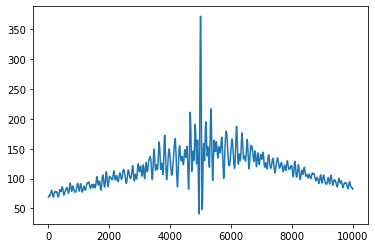

In [ ]:
#path = "/content/"
#list = os.listdir(path)
#files = []
#for file in list:
#    if file.endswith(".wav"):
#        files.append(file)

samples_max = 50000
directory = "data"
samples_set = [ ["rec48.wav", 0, samples_max], ["rec48.wav", samples_max, 2*samples_max], ["rec50.wav", 0, samples_max],  ["rec51.wav", 0, samples_max], ["rec54.wav", 0, samples_max], ["rec55.wav", 0, samples_max], ["rec58.wav", 0, samples_max], ["rec59.wav", 0, samples_max] ]
print(samples_set)
samples_set = [["rec48.wav", 0, samples_max]]

for filename, start_index, end_index in samples_set:
    print(f"Processing {filename}: ")
    
    y, sr = lr.load(os.path.join(path, filename), sr=44100, mono=False)
    #lr.util.normalize(y[0])
    #lr.util.normalize(y[1])
    print(y.shape)

    dt_max, s_max = calc_dt(y[0][start_index:end_index], y[1][start_index:end_index], sr)
    print(f"dt_max: {dt_max * 1e3:0.3f} ms \t smax: {s_max} m")

    #y, sr = lr.load(path +"/"+ filename, mono=True)

    #time = np.arange(0,len(y))/sr
    #fig, ax = plt.subplots()
    #ax.set_title(filename)
    #ax.plot(time,y)
    #ax.set(xlabel='Time(s)',ylabel='sound amplitude')
    #plt.show()
    
    #lr.feature.melspectrogram(y=y, sr=sr)

    #D = np.abs(lr.stft(y))**2
    #S = lr.feature.melspectrogram(S=D)
    #S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    #plt.figure(figsize=(10, 4))
    #lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
    #plt.colorbar(format='%+2.0f dB')
    #plt.title('Mel spectrogram')
    #plt.tight_layout()
    #plt.show()

In [ ]:
print(y.shape)
print(sr)

(22050,)
22050


In [ ]:

y_rec48,sr_rec48 = lr.load(path +"/rec48.wav", mono=False)
print(y_rec48.shape)
print(sr_rec48)

#lr.util.normalize(y_rec48[0])
#lr.util.normalize(y_rec48[1])

index_len = len(y_rec48[1])
n = int(index_len /2)
cor = np.correlate(y_rec48[0,:n],y_rec48[1,:n], "same")
cor1 = np.sqrt(np.correlate(y_rec48[1,:n],y_rec48[1,:n], "same")[int(n/2)] * np.correlate(y_rec48[0,:n],y_rec48[0,:n], "same")[int(n/2)])
corr = cor / cor1

dt_max = (np.argmax(corr) - n) / sr_rec48
s_max = dt_max * 330

print(f"tmax = {dt_max * 1000} ms smax = {s_max} m")

dt_max, s_max = calc_dt(y_rec48[0][n:], y_rec48[1][n:], sr_rec48)

print(f"Function calc_dt: tmax = {dt_max * 1000} ms smax = {s_max} m")


#print(cor.shape)
#print(cor)
#print(cor[66149])
#plt.plot(cor)

(2, 66150)
22050
tmax = -750.0680272108843 ms smax = -247.52244897959184 m
Function calc_dt: tmax = -0.09070294784580499 ms smax = -0.029931972789115645 m


In [ ]:
dt_max, s_max = calc_dt(y_rec48[0][n:], y_rec48[1][n:], sr_rec48)

print(f"Function calc_dt: tmax = {dt_max * 1000} ms smax = {s_max} m")

In [ ]:
y_rec51,sr_rec51 = lr.load(path +"/rec51.wav", mono=False)
print(y_rec51.shape)
print(sr_rec51)

cor = np.correlate(y_rec51[0,:],y_rec51[1,:])
print(cor.shape)
print(cor)

#plt.plot(cor)

(2, 66150)
22050
(1,)
[1274.403]


(2, 66150)
22050
(132299,)
[-0.00304092  0.00053226 -0.00453594 ... -0.00115059  0.00120308
 -0.00164447]
tmax = -0.40816326530612246 ms smax = -0.1346938775510204 m


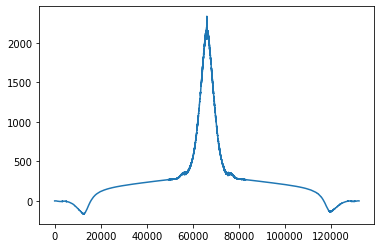

In [ ]:
y_rec54,sr_rec54 = lr.load(path +"/rec54.wav", mono=False)
print(y_rec54.shape)
print(sr_rec54)

cor = np.correlate(y_rec54[0,:],y_rec54[1,:], 'full')
print(cor.shape)
print(cor)

xmax = np.argmax(cor)
x = len(y_rec54[0])

xmax = xmax - x
tmax = xmax / sr

smax = 330 * tmax


print(f"tmax = {tmax * 1000} ms smax = {smax} m")
xmax = np.argmax(cor)

#plt.plot(cor[xmax - 100: xmax + 100])
plt.plot(cor)

In [ ]:
y_rec55,sr_rec55 = lr.load(path +"/rec55.wav", mono=False)
print(y_rec55.shape)
print(sr_rec55)

cor = np.correlate(y_rec55[0,:],y_rec55[1,:])
print(cor.shape)
print(cor)

#plt.plot(cor)
from scipy import signal
#n = len(y_rec55[1])
#cor = np.correlate(y_rec55[0,:],y_rec55[1,:], "same")
#cor1 = np.sqrt(np.correlate(y_rec55[1,:],y_rec55[1,:], "same")[int(n/2)] * np.correlate(y_rec55[0,:],y_rec55[0,:], "same")[int(n/2)])
#corr = cor / cor1
#delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
#delay = delay_arr[np.argmax(corr)]
#print(delay)
#plt.plot(delay_arr,corr)

lags = signal.correlation_lags((y_rec55[0,:]).size, (y_rec55[1,:]).size, mode="full")
print(lags)



(2, 66150)
22050
(1,)
[1517.8647]


AttributeError: ignored

(2, 22050)
22050
(44099,)
[-0.00031504 -0.01385303 -0.03091832 ... -0.03398355 -0.01537557
 -0.00034984]


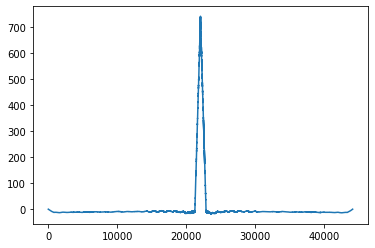

In [ ]:
y_rec155,sr_rec155 = lr.load(path +"/rec155.wav", mono=False)
print(y_rec155.shape)
print(sr_rec155)

cor = np.correlate(y_rec155[0,:],y_rec155[1,:], 'full')
print(cor.shape)
print(cor)

plt.plot(cor)